In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns

from cplAE_snmCAT.utils.proc import select_dataset_v2
from cplAE_snmCAT.utils.proc import read_dataset_v2
from cplAE_snmCAT.utils.load_config import load_config
from cplAE_snmCAT.utils.plots import discrete_to_color, plot_representations

sns.set()

In [2]:
paths = load_config()

D = select_dataset_v2(1000,
                    select_T='sorted_highvar_T_genes',
                    select_E='sorted_highvar_E_genes')

T, E, M, genes = read_dataset_v2()
M.columns

Index(['Technology', 'Brain Region', 'AD Index', 'Total Methylome Reads',
       'Overall Adjusted mCG%', 'Overall Adjusted mCH%', 'Overall mCCC%',
       'tsne_0', 'tsne_1', 'umap_0', 'umap_1', 'pca_0', 'pca_1', 'pca_2',
       'pca_3', 'MajorCluster', 'ClusterAnno', 'MajorType',
       'SubClusterInternalID', 'subumap_0', 'subumap_1', 'subtsne_0',
       'subtsne_1', 'SubMarker', 'SubClusterAnno', 'MajorMarker',
       'Individual ID', 'Individual Label', 'Individual Age', 'm3c_cluster'],
      dtype='object')

```bash
# Uncoupled: the autoencoders are independently processing individual modalities
python torch_train.py --exp_name v2 --model_id Sep23 --alpha_T 1 --alpha_E 1 --lambda_TE 0 --augment_decoders 0 --latent_dim 2 --remove_outliers 1 --n_epochs 5000

# Coupled: latent spaces are coupled through lambda_TE and "augment_decoders"
python torch_train.py --exp_name v2 --model_id Sep23 --alpha_T 1 --alpha_E 1 --lambda_TE 1 --augment_decoders 1 --latent_dim 2 --remove_outliers 1 --n_epochs 5000
```

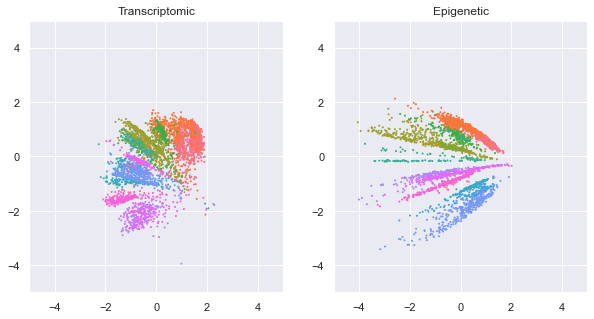

In [3]:
result_dir = paths['package_dir'] / 'data/results/v2/'
file = 'Sep23_aT_1-0_aE_1-0_csTE_0-0_ad_0_ld_2_bs_500_ne_1000_out_1_ri_0_exit-summary.mat'

out = sio.loadmat(result_dir / file, squeeze_me=True)
outliers_df = pd.read_csv(paths['data_dir'] / 'outliers.csv')
inliers = np.setdiff1d(np.arange(out['zT'].shape[0]), outliers_df['ind'].values)

plot_representations(out=out,ind=inliers,
                     col=discrete_to_color(M['ClusterAnno'].values),
                     lims=(-5,5))

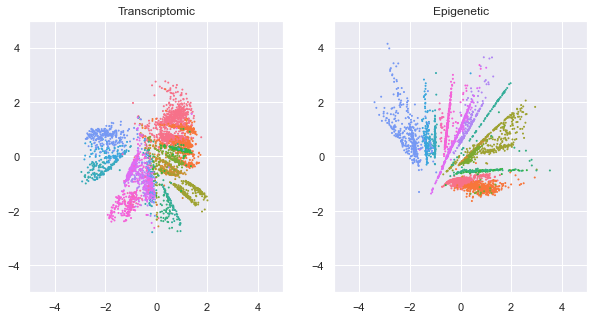

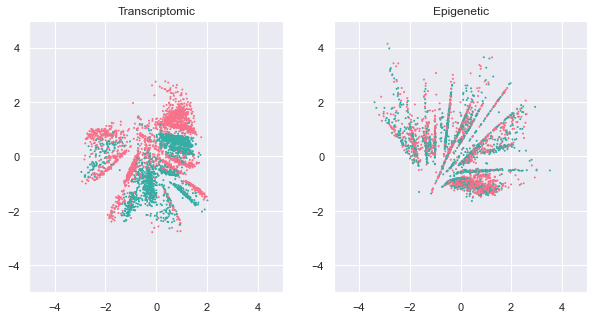

In [4]:
result_dir = paths['package_dir'] / 'data/results/v2/'
file = 'Sep23_aT_1-0_aE_1-0_csTE_0-0_ad_0_ld_2_bs_500_ne_5000_out_1_ri_0_exit-summary.mat'

out = sio.loadmat(result_dir / file, squeeze_me=True)
outliers_df = pd.read_csv(paths['data_dir'] / 'outliers.csv')
inliers = np.setdiff1d(np.arange(out['zT'].shape[0]), outliers_df['ind'].values)

plot_representations(out=out,ind=inliers,
                     col=discrete_to_color(M['ClusterAnno'].values),
                     lims=(-5,5))

plot_representations(out=out,ind=inliers,
                     col=discrete_to_color(M['Individual Label'].values),
                     lims=(-5,5))

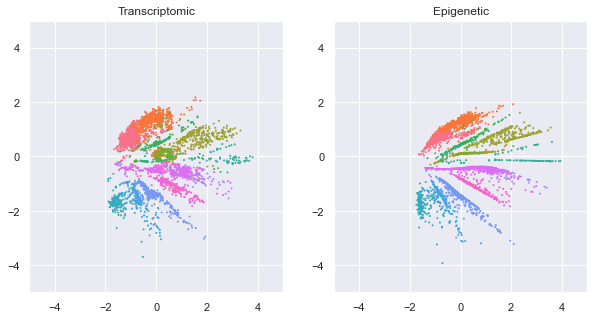

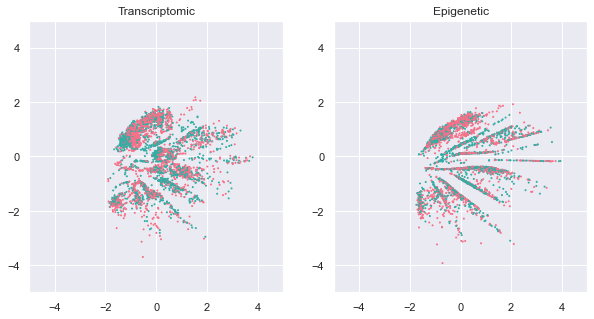

In [5]:
result_dir = paths['package_dir'] / 'data/results/v2/'
file = 'Sep23_aT_1-0_aE_1-0_csTE_1-0_ad_1_ld_2_bs_500_ne_5000_out_1_ri_0_exit-summary.mat'

out = sio.loadmat(result_dir / file, squeeze_me=True)
outliers_df = pd.read_csv(paths['data_dir'] / 'outliers.csv')
inliers = np.setdiff1d(np.arange(out['zT'].shape[0]), outliers_df['ind'].values)

plot_representations(out=out,ind=inliers,
                     col=discrete_to_color(M['ClusterAnno'].values),
                     lims=(-5,5))

plot_representations(out=out,ind=inliers,
                     col=discrete_to_color(M['Individual Label'].values),
                     lims=(-5,5))